# Лабораторная работа №1
### Выполнила Рындина Валерия, M33351

## 1. практика первичных навыков обработки данных: нормализация, One-Hot преобразование

Использованные данные: vehicle

In [25]:
import pandas as pd

In [26]:
dt = pd.read_csv('data/raw/dataset_54_vehicle.csv')
dt.Class.unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [27]:
# one-hot
dt = dt.assign(isVan=dt.Class.apply(lambda x: (x == "van") * 1),
               isSaab=dt.Class.apply(lambda x: (x == "saab") * 1),
               isBus=dt.Class.apply(lambda x: (x == "bus") * 1),
               isOpel=dt.Class.apply(lambda x: (x == "opel") * 1))
dt = dt.drop(columns=['Class'])

dt.head(5)

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,...,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,isVan,isSaab,isBus,isOpel
0,95,48,83,178,72,10,162,42,20,159,...,184,70,6,16,187,197,1,0,0,0
1,91,41,84,141,57,9,149,45,19,143,...,158,72,9,14,189,199,1,0,0,0
2,104,50,106,209,66,10,207,32,23,158,...,220,73,14,9,188,196,0,1,0,0
3,93,41,82,159,63,9,144,46,19,143,...,127,63,6,10,199,207,1,0,0,0
4,85,44,70,205,103,52,149,45,19,144,...,188,127,9,11,180,183,0,0,1,0


In [28]:
 # minmax normalize
for col in dt.columns :
    min_val = min(dt[col])
    max_val = max(dt[col])
    dt[col] = dt[col].apply(lambda x: (x - min_val) / (max_val - min_val))

dt.head(5)

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,...,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,isVan,isSaab,isBus,isOpel
0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,...,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333,1.0,0.0,0.0,0.0
1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,...,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000,1.0,0.0,0.0,0.0
2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,...,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000,0.0,1.0,0.0,0.0
3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,...,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667,1.0,0.0,0.0,0.0
4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,...,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667,0.0,0.0,1.0,0.0


## 2. сведение задачи классификации к задаче непараметрической регрессии

In [29]:
# разделить на x, y
y_names = ['isVan', 'isSaab', 'isBus', 'isOpel']

x_val = dt.drop(columns=y_names)
y_val = dt[y_names]

y_val.head(5)

,isVan,isSaab,isBus,isOpel
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


## 3. реализация решения задачи непараметрической регрессии ядерным сглаживанием Надарая Ватсона

In [30]:
import math
import numpy as np

In [31]:
# distance's functions
def euclidean_distance(x, y):
    return math.dist(x, y)

def manhattan_distance(x, y):
    return sum(abs(px - qx) for px, qx in zip(x, y))

def chebyshev_distance(x, y):
    return max(abs(px - qx) for px, qx in zip(x, y))

distances = [
    euclidean_distance,
    manhattan_distance,
    chebyshev_distance
]

In [32]:
# kernel's functions
def uniform_kernel(u):
    return 0.5

def triangular_kernel(u):
    return 1 - abs(u)

def epanechnikov_kernel(u):
    return 0.75 * (1 - u*u)

def quartic_kernel(u):
    return (15/16) * ((1 - u*u) ** 2)

kernels = [
    uniform_kernel,
    triangular_kernel,
    epanechnikov_kernel,
    quartic_kernel
]

In [33]:
# Nadaray Watson
def non_param_regh(x, x_train, y_train, dist, ker, h):
    numerator = sum(y_i * ker(dist(x, x_i) / h)
                    for x_i, y_i in zip(x_train.values, y_train.values)) \
        if h != 0 else sum(y_i * ker(0) for y_i in y_train.values)
    denominator = sum(ker(dist(x, x_i) / h) for x_i in x_train.values) \
        if h != 0 else sum(ker(0) for _ in x_train.values)

    return numerator / denominator

In [46]:
# F-measure
def f_measure(predictions, targets):
    # sklearn.metrics.f1_score
    true_positive = 0
    false_positive = 0
    false_negative = 0

    for pred_i, tar_i in zip(predictions, targets):
        if tar_i == 0:
            if pred_i == 0:
                false_positive += 1
            else: false_negative += 1
        elif pred_i == 1:
            true_positive += 1

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    return 2 * precision * recall / (precision + recall) if precision + recall != 0 else 0

In [72]:
# leave one out
def leave_one_out(x, y, dist, ker, h):
    predictions = []
    target = []

    for i in range(0, len(x)):
        x_train = x.drop(i, axis=0)
        y_train = y.drop(i, axis=0)
        x_i = x.iloc[i]

        pred_i = np.argmax(non_param_regh(x_i, x_train, y_train, dist, ker, h(i)))

        pred_y = [0]*len(y.columns)
        pred_y[pred_i] = 1
        predictions += pred_y
        target.extend(y.iloc[i].values)
    return f_measure(predictions, target)

In [69]:
# neighbors
def get_neighbors(i, xs, dist, n):
    all_dist = []
    for x in xs.values:
        all_dist.append(dist(i, x))
    neighbors = []
    max_dist = np.argmax(all_dist)
    for _ in range(n):
        ind = np.argmin(all_dist)
        neighbors.append(ind)
        all_dist[ind] = all_dist[max_dist]

    return neighbors

## 4. практика наивного настройки и анализа гиперпараметров модели, решающей задачу непараметрической регрессии

In [50]:
def find_best_parameters_fix_window(x, y):
    f_max = 0.
    param_max = []
    for cur_dist in distances:
        print("DISTANCE:", cur_dist.__name__)

        r_d = 0
        for x_i in x.values:
            for x_j in x.values:
                r_d = max(r_d, cur_dist(x_i, x_j))
        print("max distance:", r_d)
        step = r_d / math.sqrt(len(x))

        for cur_ker in kernels:
            print("KERNEL:", cur_ker.__name__)
            cur_h = step
            while cur_h <= r_d:
                print(".", end="")
                f_cur = leave_one_out(x, y, cur_dist, cur_ker, lambda _: cur_h)
                if f_cur > f_max:
                    f_max = f_cur
                    param_max = [cur_dist, cur_ker, cur_h]
                cur_h += step
            print("")
            print("current f_max:", f_max)
    print("max f-measure:", f_max)
    if len(param_max) >= 3:
        print("parameters:", param_max[0].__name__, ",", param_max[1].__name__, ",", param_max[2])
    return param_max

parameters = find_best_parameters_fix_window(x_val, y_val)

DISTANCE: euclidean_distance
max distance: 2.884204598195652
KERNEL: uniform_kernel
.............................
current f_max: 0.0
KERNEL: triangular_kernel
.............................
current f_max: 0.2477771191464137
KERNEL: epanechnikov_kernel
.............................
current f_max: 0.2477771191464137
KERNEL: quartic_kernel
.............................
current f_max: 0.2477771191464137
DISTANCE: manhattan_distance
max distance: 10.871109312989647
KERNEL: uniform_kernel
.............................
current f_max: 0.2477771191464137
KERNEL: triangular_kernel
.............................
current f_max: 0.25265017667844525
KERNEL: epanechnikov_kernel
.............................
current f_max: 0.25265017667844525
KERNEL: quartic_kernel
.............................
current f_max: 0.25265017667844525
DISTANCE: chebyshev_distance
max distance: 1.0
KERNEL: uniform_kernel
.............................
current f_max: 0.25265017667844525
KERNEL: triangular_kernel
................

In [51]:
r = 0
for x__i in x_val.values:
    for x__j in x_val.values:
        r = max(r, parameters[0](x__i, x__j))
h_ = st = r / math.sqrt(len(x_val))

f_values = []
while h_ <= r:
    f_values.append(leave_one_out(x_val, y_val, parameters[0], parameters[1], h_))
    h_ += st

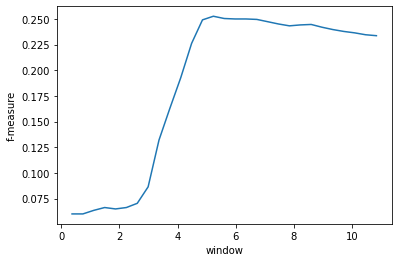

In [74]:
import matplotlib.pyplot as plt

sqrt = math.sqrt(len(x_val))
hs = range (1, round(sqrt) + 1)
hs = hs * r / sqrt

plt.plot(hs, f_values)
plt.ylabel("f-measure")
plt.xlabel("window")
plt.show()

In [75]:
def find_best_parameters_unfix_window(x, y):
    f_max = 0.
    param_max = []
    sqrt_d = round(math.sqrt(len(x))) + 1
    for cur_dist in distances:
        print("DISTANCE:", cur_dist.__name__)

        neighbors = []
        for i in range(0, len(x)):
            x_train = x.drop(i, axis=0)
            x_i = x.iloc[i]
            neighbors.append(get_neighbors(x_i, x_train, cur_dist, sqrt_d))


        for cur_ker in kernels:
            print("KERNEL:", cur_ker.__name__)

            for i in range(sqrt_d):
                print(".", end="")
                f_cur = leave_one_out(x, y, cur_dist, cur_ker, lambda j: neighbors[j][i])
                if f_cur > f_max:
                    f_max = f_cur
                    param_max = [cur_dist, cur_ker, i]
            print("")
            print("current f_max:", f_max)

    print("max f-measure:", f_max)
    if len(param_max) >= 3:
        print("parameters:", param_max[0].__name__, ",", param_max[1].__name__, ",", param_max[2])
    return param_max

other_parameters = find_best_parameters_unfix_window(x_val, y_val)

DISTANCE: euclidean_distance
KERNEL: uniform_kernel
..............................
current f_max: 0.0
KERNEL: triangular_kernel
..............................
current f_max: 0.11691022964509394
KERNEL: epanechnikov_kernel
..............................
current f_max: 0.11691022964509394
KERNEL: quartic_kernel
..............................
current f_max: 0.11691022964509394
DISTANCE: manhattan_distance
KERNEL: uniform_kernel
..............................
current f_max: 0.11691022964509394
KERNEL: triangular_kernel
..............................
current f_max: 0.12843406593406595
KERNEL: epanechnikov_kernel
..............................
current f_max: 0.12843406593406595
KERNEL: quartic_kernel
..............................
current f_max: 0.12843406593406595
DISTANCE: chebyshev_distance
KERNEL: uniform_kernel
..............................
current f_max: 0.12843406593406595
KERNEL: triangular_kernel
..............................
current f_max: 0.13141683778234084
KERNEL: epanechnikov

In [78]:
neighbors = []
for i in range(len(x_val)):
    x_train = x_val.drop(i, axis=0)
    x_i = x_val.iloc[i]
    neighbors.append(get_neighbors(x_i, x_train, other_parameters[0], round(sqrt)))

f_other_values = []
for i in range(round(sqrt)):
    f_other_values.append(leave_one_out(x_val, y_val, other_parameters[0], other_parameters[1], lambda j: neighbors[j][i]))

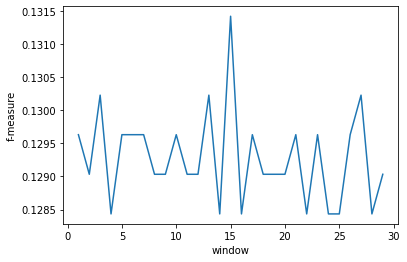

In [79]:
plt.plot(range(1, round(sqrt) + 1), f_other_values)
plt.ylabel("f-measure")
plt.xlabel("window")
plt.show()